In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Define Hyper-parameters</h2>

In [0]:
#define number of training iterations
NUM_ITER = 1000
#define learning rate
lr = 0.01
#network parameters
n_hidden_1 = 2
num_input = 2
num_classes = 2

<h2>Define your input data and expected labels</h2>

In [0]:
#define the training input data
x = np.array([[0,0],[1,0],[1,1],[0,1]],np.float32)
#define the target outputs/labels for XOR gate
y = np.array([0,1,0,1],np.float32)
y = np.reshape(y,[4,1])

In [0]:
# Function to plot decision boundary
def plot_decision_boundary(pred_func, X):
    # Set min and max values and give it some padding
    x_min, x_max =  - .1, 1.1
    y_min, y_max = - .1, 1.1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.title('Decision Boudary')
    plt.contourf(xx, yy, Z, cmap=plt.cm.copper)

    # plot scatter plot for all samples, different class with different color
    for x1, y1 in zip(x,y):
      if  y1 == 0:
        plt.scatter(x1[0],x1[1],c='blue')  
      else:
        plt.scatter(x1[0],x1[1],c='red') 

<h2>Define placeholder and Variables</h2>

In [0]:
tf.reset_default_graph()
#define the placeholder to feed the training data later
X = tf.placeholder(tf.float32,shape=[None,num_input],name='X')
Y = tf.placeholder(tf.float32,shape=[None,1],name='Y')

#define the weights and initialized with random normal distribution
weights = {
    'W1':tf.Variable(tf.random_normal([num_input,n_hidden_1]),tf.float32,name='W1'),
    'Wout':tf.Variable(tf.random_normal([n_hidden_1,1]),tf.float32,name='Wout')      
} 

#define the bias with zero initialization
biases = {
    'b1': tf.Variable(tf.zeros([n_hidden_1]),tf.float32,name='b1'),
    'bout': tf.Variable(tf.zeros([1]),tf.float32,name='bout')    
}


<h2>Define the neural network</h2>

In [0]:
#define a neural net model
def neural_net(x):
    layer_1_out = tf.tanh(tf.matmul(X,weights['W1']) + biases['b1'])
    out = tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout'])
    return out

#predicted labels
logits = neural_net(X)


<h2>Define cost function</h2>

2 class cross-entropy :   $ Cost = \sum\limits_{i=1}^n[ ylog\hat{y}+(1-y)log(1-\hat{y})]$

In [0]:
#define loss
cost = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=neural_net(X),labels=Y),name='loss')
pred = tf.round(tf.sigmoid(neural_net(X)))
correct_pred = tf.equal(pred,Y)
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')
#define the optimizer, here we use standard gradient descent method
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost)


<h2>Execute training</h2>

final state prediction:
 x    y_true y_prediction
[0. 0.] [0.] [0.]
[1. 0.] [1.] [1.]
[1. 1.] [0.] [0.]
[0. 1.] [1.] [1.]


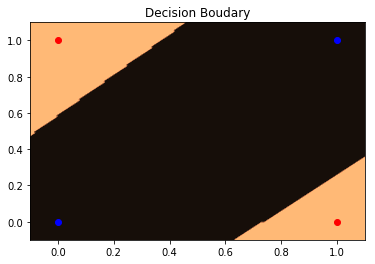

In [77]:
#initialize tensorflow variables
init = tf.global_variables_initializer()

# construct cost_list to plot
ac_list = []

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(NUM_ITER):
        ac_list.append(sess.run(accuracy,feed_dict={X:x,Y:y}))
        if i == NUM_ITER-1:
            pred1 = sess.run(tf.round(tf.sigmoid(logits)),feed_dict = {X:x})
            print('final state prediction:\n','x   ','y_true','y_prediction')
            for i, j, k in zip(x,y,pred1):
              print(i,j,k)

        #every iteration we run optimization on the training data X and labels Y
        sess.run(optimizer,feed_dict = {X:x,Y:y})
        
    plot_decision_boundary(lambda x: sess.run(pred, feed_dict={X:x}), x)  
              

<h2>Plot</h2>

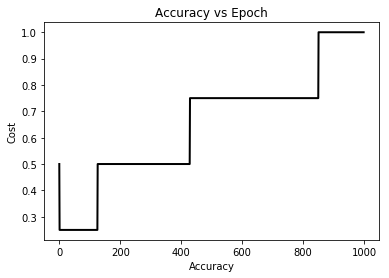

In [78]:
    # plot cost vs epoch
    plot_x = np.arange(0,NUM_ITER,1)
    plot_y = ac_list
    plt.title('Accuracy vs Epoch')
    plt.xlabel("Accuracy")
    plt.ylabel("Cost")
    plt.plot(plot_x, plot_y, color='k', linewidth=2)